<a href="https://colab.research.google.com/github/kwuan95/Curso_profesional_de_ML_con_Scikit_Learn/blob/master/decision_tree_random_forest_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [ ]:
#Importamos las librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The dataset you've provided appears to be related to car evaluations. However, the column names are not explicitly defined, making it a bit challenging to understand the data at first glance. Let's infer the columns based on the values:

First Column (vhigh): This could represent the buying price of the car, with values like 'vhigh' (very high), possibly indicating different price ranges.

Second Column (vhigh.1): This might represent the maintenance cost of the car, with similar categorization as the buying price.

Third Column (2): This might be the number of doors the car has, with values like '2', '3', '4', etc.

Fourth Column (2.1): This could be related to the capacity of the car, like the number of persons it can carry.

Fifth Column (small): This likely represents the size of the luggage boot.

Sixth Column (low): This could be an indicator of the safety rating or features of the car, with values like 'low', 'med', 'high'.

Seventh Column (unacc): This seems to be the overall evaluation of the car, with 'unacc' possibly standing for 'unacceptable', and other categories like 'acc' for 'acceptable', 'good', and 'vgood' for 'very good'.

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [ ]:
#Cargamos dataset a utilizar
df_car = pd.read_csv("/content/car_evaluation.csv", header=None)

## Análisis exploratorio de datos

In [ ]:
#Visualizacion del dataframe
df_car.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [ ]:
#Analizamos el shape del objeto
print(df_car.shape)

(1728, 7)


In [ ]:
#Como podemos observar vamos a renombrar las columnas de manera correcta
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = col_names

In [ ]:
#Vericamos la transformacion
df_car.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [ ]:
#Visualizamos los tipos de datos
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [ ]:
# Exploremos un poco mas la variable target
df_car['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
#Verificamos valores missings
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Procesamiento de datos

In [ ]:
#Separamos en X e y
X = df_car.drop(['class'], axis = 1)
y = df_car['class']

In [ ]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [ ]:
#Veamos que obtuvimos
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [ ]:
y_train.shape, y_test.shape

((1209,), (519,))

In [ ]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [ ]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [ ]:
y_train.head()


1178    vgood
585     unacc
1552      acc
1169    unacc
1033    unacc
Name: class, dtype: object

## Entrenamiento de modelo de clasificación con árbol de decisión

In [ ]:
!!pip install category-encoders

['Collecting category-encoders',
 '  Downloading category_encoders-2.6.3-py2.py3-none-any.whl (81 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/81.9 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b30.7/81.9 kB\x1b \x1b894.2 kB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b81.9/81.9 kB\x1b \x1b1.1 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hRequirement already satisfied: numpy>=1.14.0 in /usr/local/lib/python3.10/dist-packages (from category-encoders) (1.23.5)',
 'Requirement already satisfied: scikit-learn>=0.20.0 in /usr/local/lib/python3.10/dist-packages (from category-encoders) (1.2.2)',
 'Requirement already satisfied: scipy>=1.0.0 in /usr/local/lib/python3.10/dist-packages (from category-encoders) (1.11.4)',
 'Requirement already satisfied: statsmodels>=0.9.0 in /usr/local/lib/python3.10/dist-packages (from category-encoders) (0.

In [ ]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
import category_encoders as ce #pip install category-encoders

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons','lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
#Verificamos la transformacion
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [ ]:
X_train.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
dtype: object

In [ ]:
y_train

array([3, 2, 0, ..., 0, 2, 0])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform y_train
y_train = label_encoder.fit_transform(y_train)

# Transform y_test
y_test = label_encoder.transform(y_test)


In [ ]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 0)

In [ ]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [ ]:
y_train_pred_tree

array([0, 2, 2, ..., 0, 2, 2])

## Evaluación de modelo de clasificación con árbol de decisión

In [ ]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('El accuracy en train es:', train_accuracy_tree)
print('El accuracy en test es:', test_accuracy_tree)

El accuracy en train es: 0.7733664185277088
El accuracy en test es: 0.7591522157996147


In [ ]:
from sklearn.metrics import f1_score

train_f1_tree = f1_score(y_train, y_train_pred_tree, average='micro')
test_f1_tree = f1_score(y_test, y_test_pred_tree, average='micro')

print("El f1 score en train es: ", train_f1_tree)
print("El f1 score en test es: ", test_f1_tree)

El f1 score en train es:  0.7733664185277088
El f1 score en test es:  0.7591522157996146


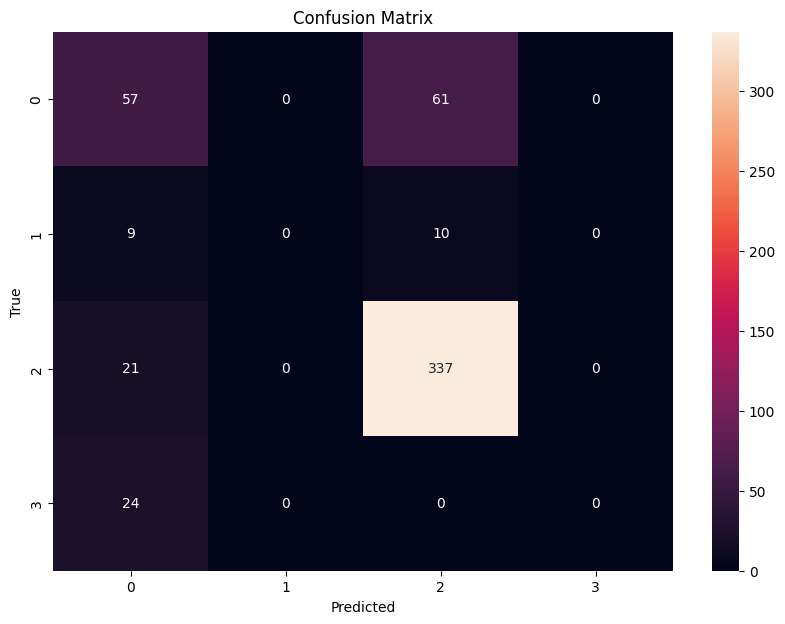

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_tree)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


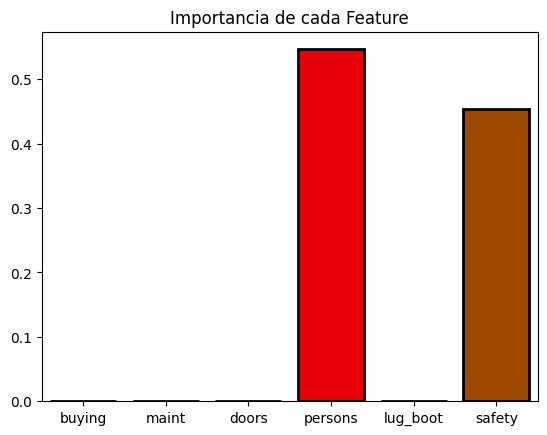

In [ ]:
#Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, palette = 'bright', saturation = 2.0, edgecolor ='black', linewidth = 2)
plt.title('Importancia de cada Feature')
plt.show()

In [ ]:
importances

array([0.        , 0.        , 0.        , 0.54660193, 0.        ,
       0.45339807])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Crear una nueva instancia de OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Seleccionar solo las columnas 'persons', 'safety' y 'class'
selected_columns = ['persons', 'safety', 'class']
data_selected = df_car[selected_columns]

# Convertir variables categóricas a numéricas (usando la misma instancia de OrdinalEncoder)
data_selected_encoded = ordinal_encoder.fit_transform(data_selected)

# Convertir a DataFrame y asignar nombres de columnas
data_selected_encoded = pd.DataFrame(data_selected_encoded, columns=selected_columns)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_selected = data_selected_encoded.drop('class', axis=1)
y_selected = data_selected_encoded['class']
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected, test_size=0.3, random_state=42)

# Entrenar un modelo de árbol de decisión
decision_tree_selected = DecisionTreeClassifier(random_state=42)
decision_tree_selected.fit(X_train_selected, y_train_selected)

# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy_selected = decision_tree_selected.score(X_test_selected, y_test_selected)

accuracy_selected

0.7745664739884393

## Entrenamiento de modelo de clasificación con random forest

In [ ]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 5, random_state =0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [ ]:
#Calculo de las predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

## Evaluación de modelo de clasificación con random forest

In [ ]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_rf =accuracy_score(y_train, y_train_pred_rf)

#Calculo el accuracy en Test
test_accuracy_rf =accuracy_score(y_test, y_test_pred_rf)

print('El accuracy en train es:', train_accuracy_rf)
print('El accuracy en test es:', test_accuracy_rf)

#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

El accuracy en train es: 0.9842845326716294
El accuracy en test es: 0.8766859344894027


In [ ]:
# Visualizacion de las feature importantes
features_scores = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
features_scores

safety      0.266614
buying      0.212652
persons     0.204041
maint       0.126611
lug_boot    0.100664
doors       0.089417
dtype: float64

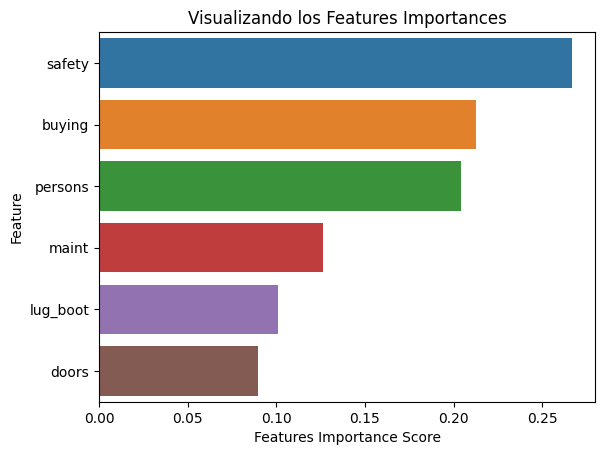

In [ ]:
#Grafico de barras
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=features_scores , y = features_scores.index)
plt.xlabel('Features Importance Score')
plt.ylabel('Feature')
plt.title("Visualizando los Features Importances")
plt.show()

Matriz de Confusion

 [[ 93   3  19   3]
 [ 11   6   0   2]
 [ 11   0 347   0]
 [ 13   2   0   9]]


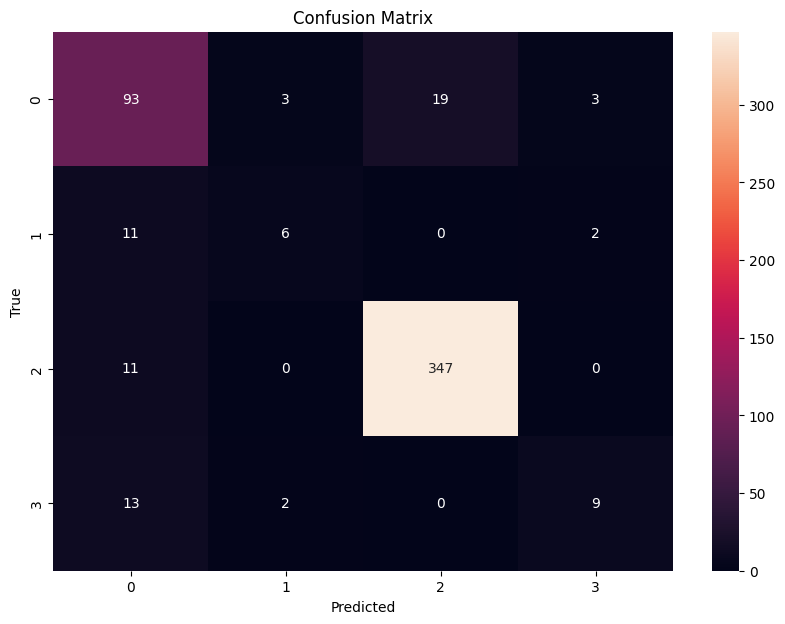

In [ ]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_pred_rf)

print('Matriz de Confusion\n\n', cm)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       118
           1       0.55      0.32      0.40        19
           2       0.95      0.97      0.96       358
           3       0.64      0.38      0.47        24

    accuracy                           0.88       519
   macro avg       0.72      0.61      0.65       519
weighted avg       0.87      0.88      0.87       519

